In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

In [4]:
# Create a set of random latitude and longitude combinations 
lats = np.random.uniform(-90, 90, size = 1500)
lngs = np.random.uniform(-180, 180, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
from citipy import citipy

In [6]:
# Add the latitudes and longitudes to a list 
coordinates = list(lat_lngs)

In [7]:
# Create a list for holding the cities 
cities = []

# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates: 
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name 

    # If the city is unique, then add it to the cities list
    if city not in cities: 
        cities.append(city)

# Print the city count to confirm sufficient count 
len(cities)

644

In [8]:
from config import weather_api_key

In [9]:
url = "http://api.openweathermap.org/data/2.5/weather?"

In [10]:
import time 
from datetime import datetime 
import requests

In [13]:
# Create an empty list to hold the weather data 
city_data = []

# Print the beginning of the logging 
print("Beginning Data Retrieval           ")
print("-----------------------------------")

# Create counters 
record_count = 1
set_count = 1 

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&appid=" + weather_api_key + "&q=" + city.replace(" ","+") 

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

    

Beginning Data Retrieval           
-----------------------------------
Processing Record 1 of Set 1 | petropavlovsk-kamchatskiy
Processing Record 2 of Set 1 | necochea
Processing Record 3 of Set 1 | san jose
Processing Record 4 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 5 of Set 1 | smoky lake
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | khatanga
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | bluff
Processing Record 11 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 12 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 13 of Set 1 | jimeta
Processing Record 14 of Set 1 | la ronge
Processing Record 15 of Set 1 | sisimiut
Processing Record 16 of Set 1 | hobart
Processing Record 17 of Set 1 | lebu
Processing Record 18 of Set 1 | qaanaaq
Processing Record 19 of Set 1 | bela
Processing Record 20 of Set 1 | dikson
Processing Reco

In [14]:
len(city_data)

588

In [15]:
# Convert the array of dictionaries to a Pandas dataframe 
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Petropavlovsk-Kamchatskiy,53.0452,158.6483,257.48,78,0,2.00,RU,2023-01-13 13:45:36
1,Necochea,-38.5473,-58.7368,292.66,56,95,9.53,AR,2023-01-13 13:45:37
2,San Jose,37.3394,-121.8950,289.23,56,0,4.63,US,2023-01-13 13:41:06
3,Smoky Lake,54.1169,-112.4686,257.55,92,73,1.03,CA,2023-01-13 13:45:38
4,Rikitea,-23.1203,-134.9692,298.71,76,13,8.34,PF,2023-01-13 13:45:38


In [16]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Petropavlovsk-Kamchatskiy,RU,2023-01-13 13:45:36,53.0452,158.6483,257.48,78,0,2.00
1,Necochea,AR,2023-01-13 13:45:37,-38.5473,-58.7368,292.66,56,95,9.53
2,San Jose,US,2023-01-13 13:41:06,37.3394,-121.8950,289.23,56,0,4.63
3,Smoky Lake,CA,2023-01-13 13:45:38,54.1169,-112.4686,257.55,92,73,1.03
4,Rikitea,PF,2023-01-13 13:45:38,-23.1203,-134.9692,298.71,76,13,8.34


In [17]:
# Create the output file (csv)
output_data_file = 'weather_data/cities.csv'

# Export the city_data into a csv 
city_data_df.to_csv(output_data_file, index_label= 'city_id')

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

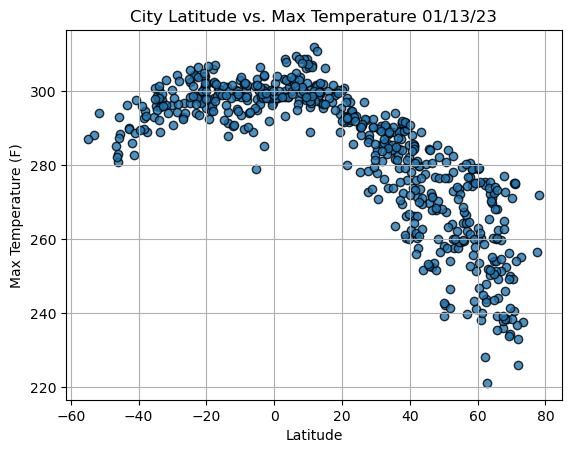

In [19]:
import time 

# Build the scatter plot for latitude vs max temp 
plt.scatter(lats, 
            max_temps, 
            edgecolors= 'black', linewidths= 1, marker= 'o', 
            alpha = 0.8, label = 'Cities')

# Incorporate the other graph proprties 
plt.title(f'City Latitude vs. Max Temperature ' + time.strftime("%x"))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True) 

# Save the figure 
plt.savefig('weather_data/Fig1.png')

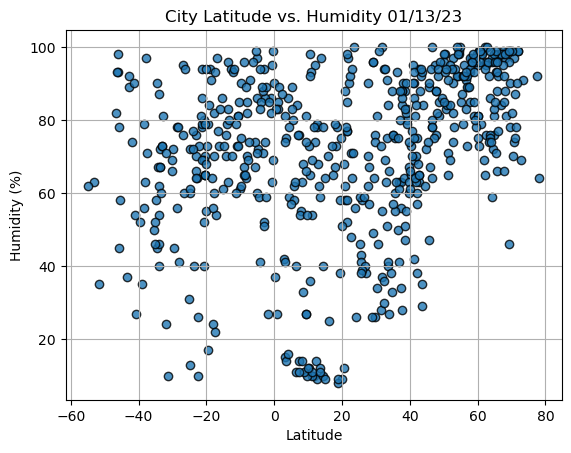

In [20]:
# Build the scatter plot for latitude vs humidity
plt.scatter(lats, 
            humidity, 
            edgecolors= 'black', linewidths= 1, marker= 'o', 
            alpha = 0.8, label = 'Cities')

# Incorporate the other graph proprties 
plt.title(f'City Latitude vs. Humidity ' + time.strftime("%x"))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True) 

# Save the figure 
plt.savefig('weather_data/Fig2.png')

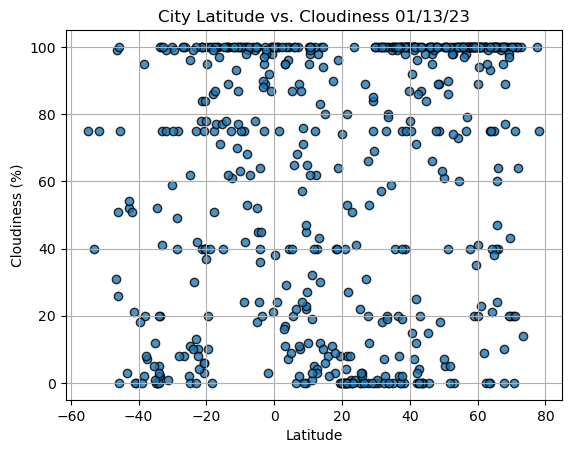

In [21]:
# Build the scatter plot for latitude vs cloudiness
plt.scatter(lats, 
            cloudiness, 
            edgecolors= 'black', linewidths= 1, marker= 'o', 
            alpha = 0.8, label = 'Cities')

# Incorporate the other graph proprties 
plt.title(f'City Latitude vs. Cloudiness ' + time.strftime("%x"))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True) 

# Save the figure 
plt.savefig('weather_data/Fig3.png')

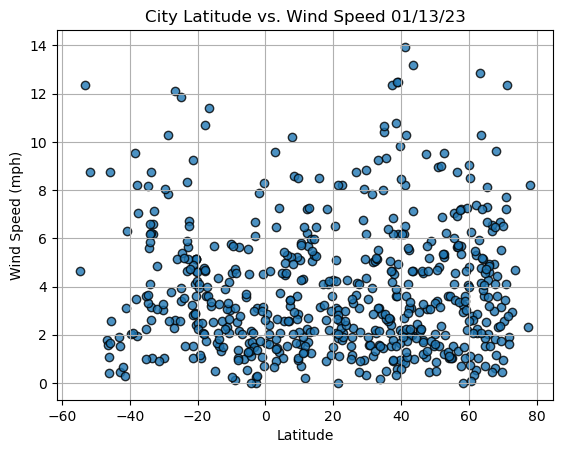

In [22]:
# Build the scatter plot for latitude vs Wind speed
plt.scatter(lats, 
            wind_speed, 
            edgecolors= 'black', linewidths= 1, marker= 'o', 
            alpha = 0.8, label = 'Cities')

# Incorporate the other graph proprties 
plt.title(f'City Latitude vs. Wind Speed ' + time.strftime("%x"))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True) 

# Save the figure 
plt.savefig('weather_data/Fig4.png')

In [23]:
from scipy.stats import linregress

# Create a function to perform linear regression on the weather data and plot a regression line and the equation with the data 
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates): 

    # Run regression on hemisphere weather data 
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line 'y values' from the slope and intercept 
    regress_values = x_values * slope + intercept 

    # Get the equation of the line 
    line_eq = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))

    # Create a scatter plot and plot the regression line 
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, 'r')

    # Annotate the text for the line equation 
    plt.annotate(line_eq, text_coordinates, fontsize = 15, color = 'red')
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel('y_label')

In [27]:
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0 )]

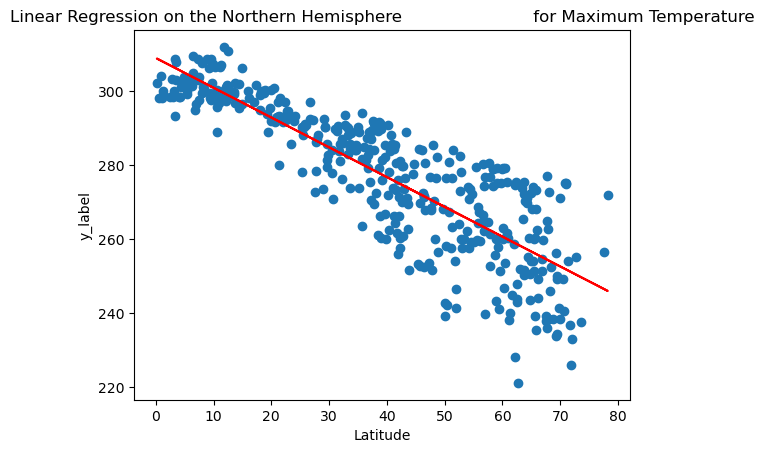

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

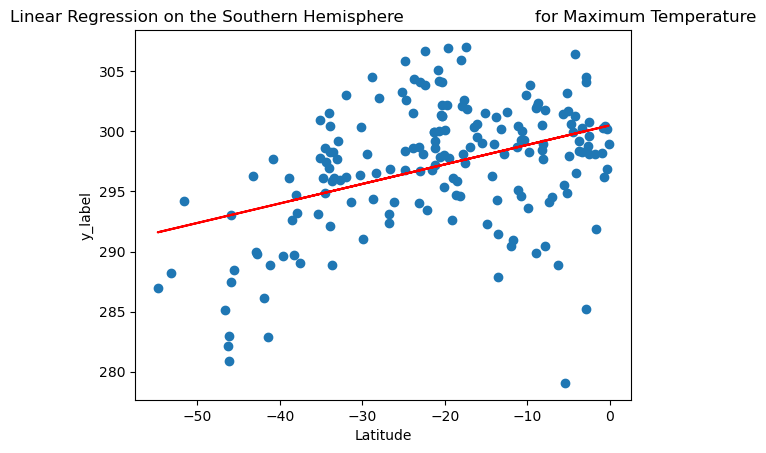

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

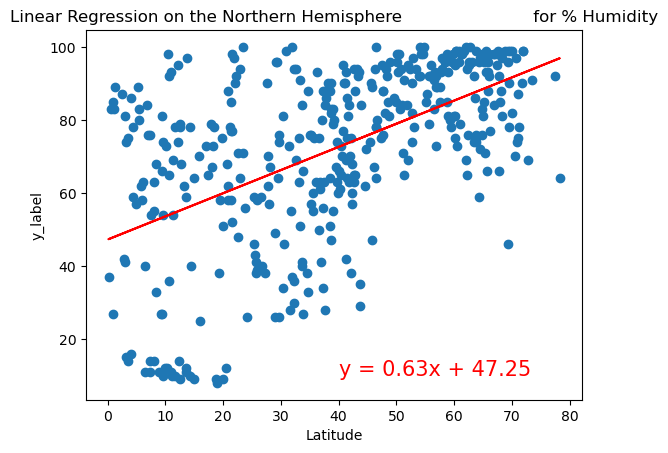

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

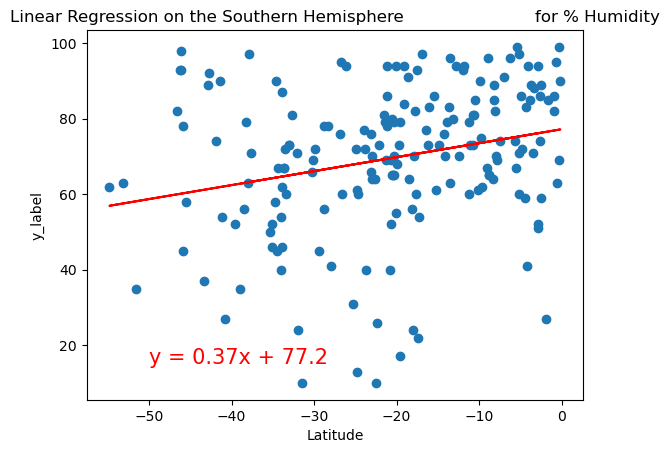

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

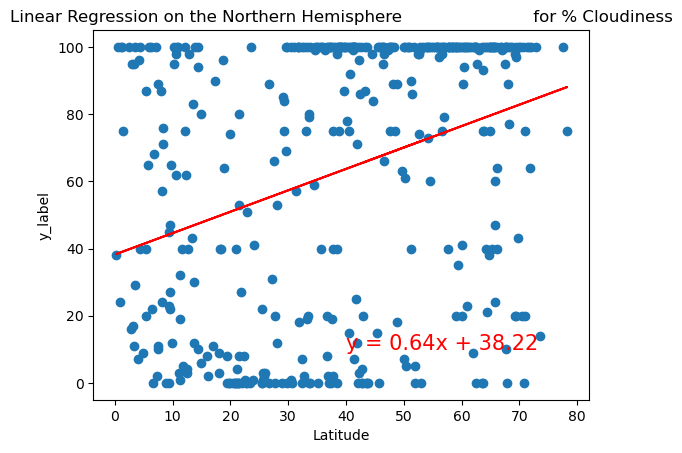

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

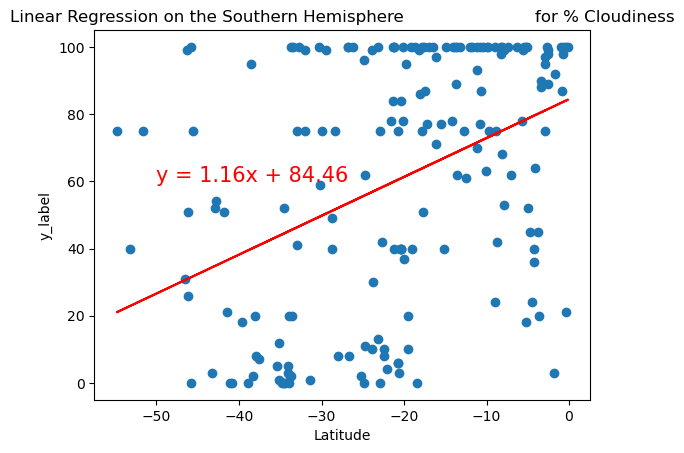

In [40]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

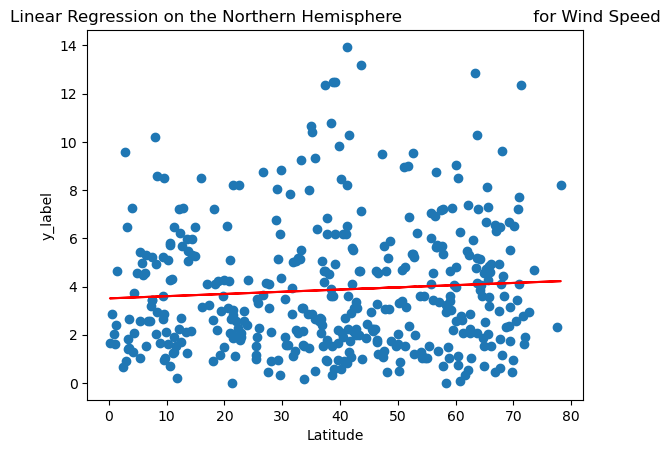

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

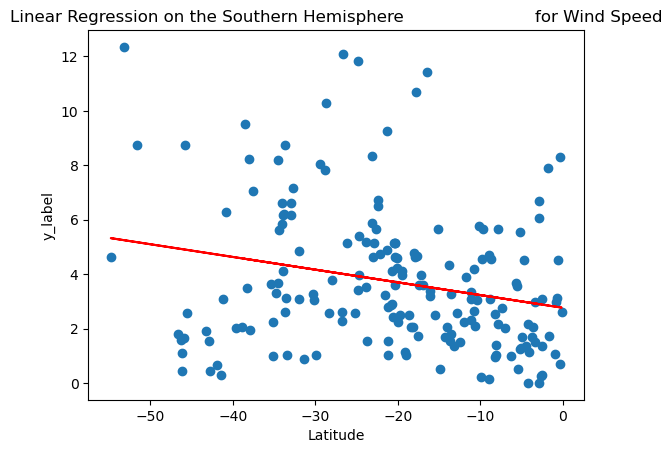

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))